# 감성분석 긍정 비율 넣기

## 데이터 불러오기

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [184]:
review=pd.read_excel('Reviewata_clean.xlsx') # 데이터 불러오기
review.head()

,Unnamed: 0,상품명,평점,리뷰내용
0,13699,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...
1,13778,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...
2,13970,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!
3,14169,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...
4,14903,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...


In [185]:
df=pd.read_excel('Reviewata_clean.xlsx')
df.rename(columns={'리뷰내용':'content'},inplace=True) 
df.content


0        두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...
1        딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...
2                             청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!
3        청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...
4        보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...
                               ...                        
57359             레깅스 말고도 편하게 입고 다닐만한 팬츠 찾고 있었어욤 \n대만족 입니당
57360    착용감이 좋고 핏이 이뻐요 강추합니다\n\n\n(2020-09-22 22:17:22...
57361                 편하게 입기좋아요 티랑 같이구매했는데 딱이에요 편하고 핏도이뻐요 
57362    편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...
57363    편해서 자주입고잇습니다\n\n(2020-08-29 22:51:14 에 등록된 네이버...
Name: content, Length: 57364, dtype: object

## 필요한 라이브러리 import

- 자연어 처리 프로그램 nltk을 install하고 실행, 형태소 분석 프로그램인 okt실행

In [186]:
len(df.content) # 전체 인덱스 개수 파악

57364

In [187]:
!pip install nltk

In [188]:
import nltk
from konlpy.tag import Okt #형태소 분석 프로그램 불러오기
t=Okt()

In [189]:
df.content.astype('str') 

0        두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...
1        딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...
2                             청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!
3        청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...
4        보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...
                               ...                        
57359             레깅스 말고도 편하게 입고 다닐만한 팬츠 찾고 있었어욤 \n대만족 입니당
57360    착용감이 좋고 핏이 이뻐요 강추합니다\n\n\n(2020-09-22 22:17:22...
57361                 편하게 입기좋아요 티랑 같이구매했는데 딱이에요 편하고 핏도이뻐요 
57362    편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...
57363    편해서 자주입고잇습니다\n\n(2020-08-29 22:51:14 에 등록된 네이버...
Name: content, Length: 57364, dtype: object

In [190]:
content_text=''

for each_line in df.content.astype('str'):
    content_text=content_text + each_line + '\n'

In [191]:
print(df.content)
print(df.shape)

0        두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...
1        딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...
2                             청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!
3        청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...
4        보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...
                               ...                        
57359             레깅스 말고도 편하게 입고 다닐만한 팬츠 찾고 있었어욤 \n대만족 입니당
57360    착용감이 좋고 핏이 이뻐요 강추합니다\n\n\n(2020-09-22 22:17:22...
57361                 편하게 입기좋아요 티랑 같이구매했는데 딱이에요 편하고 핏도이뻐요 
57362    편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...
57363    편해서 자주입고잇습니다\n\n(2020-08-29 22:51:14 에 등록된 네이버...
Name: content, Length: 57364, dtype: object
(57364, 4)


## 형태소분석

- 형태소 분석을 하면서 형태소 분석이 된 전체 토큰 개수, 중복 제외 토큰 개수 추출
- 해당 토큰들을 바탕으로 문장의 긍정 비율을 추출하게 됨


In [192]:
tokens_ko=t.morphs(content_text)  # 토큰(추출된 단어) 불러오기
tokens_ko

['두께',
 '도',
 '적당하고',
 '디자인',
 '색감',
 '다',
 '맘',
 '에',
 '들어오',
 '가격',
 '도',
 '저렴하고',
 '잘산것',
 '같아요',
 '!!',
 '담',
 '에',
 '다른',
 '색도',
 '사고싶어요',
 '\n',
 '딱',
 '기본',
 '셔츠',
 '하게',
 '좋아요',
 '!',
 '부들부들한데',
 '너무',
 '빳빳',
 '한',
 '소재',
 '도',
 '아닌게',
 '딱',
 '여리해',
 '보이',
 '고',
 '좋아요',
 'ㅎㅎ',
 '\n',
 '생각',
 '보다',
 '안',
 '커서',
 '여기저기',
 '입기',
 '좋아요',
 '👍🏻👍🏻',
 '\n',
 '청바지',
 '에도',
 '어울리고',
 '슬랙스',
 '에도',
 '어울리고',
 '좋아요',
 '!!',
 '\n',
 '청바지',
 '에',
 '입어도',
 '예쁘고',
 '치마',
 '랑',
 '입어도',
 '예뻐요',
 '!!',
 '카라',
 '가',
 '커서',
 '기본',
 '템',
 '이어도',
 '마냥',
 '무난',
 '해보이지만은',
 '않아서',
 '좋았어용',
 '\n',
 '보들보들하니',
 '딱',
 '좋아용',
 'ㅎ',
 '소재',
 '특성',
 '상',
 '주름',
 '은',
 '어쩔',
 '수',
 '없지만',
 '너무',
 '예뻐요',
 '자켓',
 '이랑',
 '같이',
 '입으니까',
 '더',
 '예쁜거',
 '같',
 '아유',
 'ㅎ',
 '\n',
 '두께',
 '도',
 '적당하고',
 '디자인',
 '색감',
 '다',
 '맘',
 '에',
 '들어오',
 '가격',
 '도',
 '저렴하고',
 '잘산것',
 '같아요',
 '!!',
 '담',
 '에',
 '다른',
 '색도',
 '사고싶어요',
 '\n',
 '딱',
 '기본',
 '셔츠',
 '하게',
 '좋아요',
 '!',
 '부들부들한데',
 '너무',
 '빳빳',
 '한',
 '소재',
 '도',
 '아닌게',


In [193]:
ko=nltk.Text(tokens_ko)
print(len(ko.tokens)) # 토큰 전체 개수
print(len(set(ko.tokens))) # 토큰 unique개수 (중복x)

1186026
32430


### 빈출 상위 100개 단어 뽑아내기 (불용어포함)

In [194]:
ko=nltk.Text(tokens_ko)
ko.vocab().most_common(100) # 가장 많이 나온 단어 100개

[('\n', 71510),
 ('이', 25442),
 ('에', 23946),
 ('도', 21139),
 ('너무', 14627),
 ('!', 12810),
 ('가', 12800),
 ('같아요', 10203),
 ('잘', 9943),
 ('구매', 9466),
 ('은', 9101),
 ('.', 8580),
 ('좋아요', 8556),
 ('핏', 8367),
 ('예뻐요', 7578),
 ('딱', 7155),
 ('는', 6770),
 ('좀', 6388),
 ('이뻐요', 6187),
 ('생각', 6150),
 ('요', 6122),
 ('ㅎㅎ', 5963),
 ('옷', 5794),
 ('보다', 5727),
 ('된', 5636),
 ('(', 5620),
 (')', 5611),
 ('-', 5490),
 (':', 5429),
 ('평', 5234),
 ('네이버', 5227),
 ('페이', 5223),
 ('등록', 5219),
 ('입기', 5208),
 ('것', 5081),
 ('!!', 4684),
 ('을', 4593),
 ('으로', 4544),
 ('더', 4473),
 ('안', 4407),
 ('~', 4388),
 ('로', 4283),
 ('..', 4041),
 ('맘', 4009),
 ('허리', 4007),
 ('사이즈', 3953),
 ('다', 3859),
 ('색상', 3796),
 ('ㅠㅠ', 3741),
 ('재질', 3639),
 ('느낌', 3620),
 ('배송', 3613),
 ('진짜', 3611),
 ('한', 3558),
 ('길이', 3511),
 ('조금', 3499),
 ('\n\n\n', 3428),
 ('색', 3407),
 ('이라', 3361),
 ('거', 3272),
 ('했는데', 3201),
 ('색감', 3191),
 ('많이', 3180),
 ('여리', 3102),
 ('고', 3097),
 ('부분', 3071),
 ('들어요', 3024),
 ('사진',

### Stop words(불용어)를 정의 후 제거하여 보다 객관적인 데이터 파악

In [195]:
#불용어 : 인터넷 검색시 검색용어로 사용하지 않는 단어, 관사, 전치사, 조사, 전치사 등 검색 색인 단어로 의미가 없는 단어
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도','좋','1','는','로','으로','2','것','은','다',',','니다','대','를','2017','들','데','..','의','때','겠','고','게','네요','한','일','할','10','?','하는','06','주','려고','인데','거','좀','는데','-','ㅎㅎ','하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려','지','있','못','후','중','줄','6','과','어떤','기본','!!','단어','라고','중요한','합','가요','....','보이','네','무지']

#stop_words에 포함되지 않은 토큰들만 추출
tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(100)

[('\n', 71510),
 ('너무', 14627),
 ('!', 12810),
 ('같아요', 10203),
 ('구매', 9466),
 ('좋아요', 8556),
 ('핏', 8367),
 ('예뻐요', 7578),
 ('딱', 7155),
 ('이뻐요', 6187),
 ('생각', 6150),
 ('옷', 5794),
 ('보다', 5727),
 ('된', 5636),
 ('(', 5620),
 (')', 5611),
 (':', 5429),
 ('평', 5234),
 ('네이버', 5227),
 ('페이', 5223),
 ('등록', 5219),
 ('입기', 5208),
 ('더', 4473),
 ('안', 4407),
 ('~', 4388),
 ('맘', 4009),
 ('허리', 4007),
 ('사이즈', 3953),
 ('색상', 3796),
 ('ㅠㅠ', 3741),
 ('재질', 3639),
 ('느낌', 3620),
 ('배송', 3613),
 ('진짜', 3611),
 ('길이', 3511),
 ('조금', 3499),
 ('\n\n\n', 3428),
 ('색', 3407),
 ('이라', 3361),
 ('했는데', 3201),
 ('색감', 3191),
 ('많이', 3180),
 ('여리', 3102),
 ('부분', 3071),
 ('들어요', 3024),
 ('사진', 2962),
 ('넘', 2924),
 ('이랑', 2913),
 ('입고', 2672),
 ('하고', 2606),
 ('이에요', 2573),
 ('랑', 2565),
 ('다른', 2560),
 ('\n\n', 2559),
 ('살짝', 2549),
 ('바지', 2536),
 ('디자인', 2483),
 ('소재', 2455),
 ('근데', 2402),
 ('입', 2360),
 ('라인', 2326),
 ('좋고', 2264),
 ('저', 2197),
 ('이쁘고', 2190),
 ('그래도', 2185),
 ('입으면', 2185),
 ('색도

### 데이터 확인 결과, 불용어가 더 존재하는 것을 확인하고, 추가적으로 불용어에 포함하여 해당 단어 제거

In [196]:
#불용어 추가하여 이것까지 반영된 토큰 추출
review_stopwords=['\n','!','(',')',':','~','\n\n\n','\n\n','넘','랑','입','저','라','용','서','만','딱','된','더','안','맘','~~','!!!','ㅎㅎㅎ','ㅎ','ㅠ','구','분','ㅜㅜ']
for word in review_stopwords:
    stop_words.append(word)

In [197]:
tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(100)

[('너무', 14627),
 ('같아요', 10203),
 ('구매', 9466),
 ('좋아요', 8556),
 ('핏', 8367),
 ('예뻐요', 7578),
 ('이뻐요', 6187),
 ('생각', 6150),
 ('옷', 5794),
 ('보다', 5727),
 ('평', 5234),
 ('네이버', 5227),
 ('페이', 5223),
 ('등록', 5219),
 ('입기', 5208),
 ('허리', 4007),
 ('사이즈', 3953),
 ('색상', 3796),
 ('ㅠㅠ', 3741),
 ('재질', 3639),
 ('느낌', 3620),
 ('배송', 3613),
 ('진짜', 3611),
 ('길이', 3511),
 ('조금', 3499),
 ('색', 3407),
 ('이라', 3361),
 ('했는데', 3201),
 ('색감', 3191),
 ('많이', 3180),
 ('여리', 3102),
 ('부분', 3071),
 ('들어요', 3024),
 ('사진', 2962),
 ('이랑', 2913),
 ('입고', 2672),
 ('하고', 2606),
 ('이에요', 2573),
 ('다른', 2560),
 ('살짝', 2549),
 ('바지', 2536),
 ('디자인', 2483),
 ('소재', 2455),
 ('근데', 2402),
 ('라인', 2326),
 ('좋고', 2264),
 ('이쁘고', 2190),
 ('그래도', 2185),
 ('입으면', 2185),
 ('색도', 2153),
 ('예쁘고', 2053),
 ('엄청', 2016),
 ('마음', 1951),
 ('기장', 1944),
 ('화면', 1890),
 ('좋은', 1856),
 ('키', 1830),
 ('에요', 1812),
 ('해서', 1807),
 ('약간', 1807),
 ('정말', 1791),
 ('치마', 1777),
 ('무난', 1754),
 ('완전', 1739),
 ('있어서', 1724),
 ('원피스', 1681

- 빈출된 상위 단어들을 graphviz 라이브러리를 이용하여 자주 추출되는 단어의 빈도수 파악

In [198]:
!pip install graphviz

## 총 단어 빈도수 시각화하기

1. graphviz

2. wordcloud



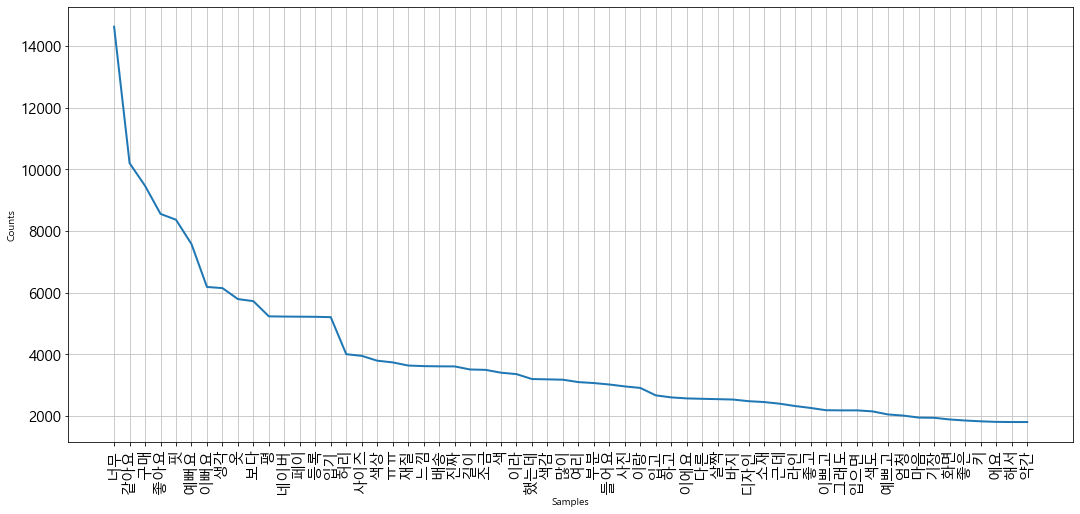

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name() # 폰트 적용
rc('font',family=font)

plt.figure(figsize=(18,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ko.plot(60) #가장 많이 나온 단어 60개만
plt.show()

#### 단어들을 살피는 의의

- 기존에 알던 것을 다시 발견, 어떤 점에서 장점이 있고, 단점이 있는지 되돌아볼 수 있음
- 예전에 몰랐던 새로운 소비자의 니즈를 파악하는 것.

## 워드클라우드로 빈도수 나타내기

In [200]:
!pip install wordcloud

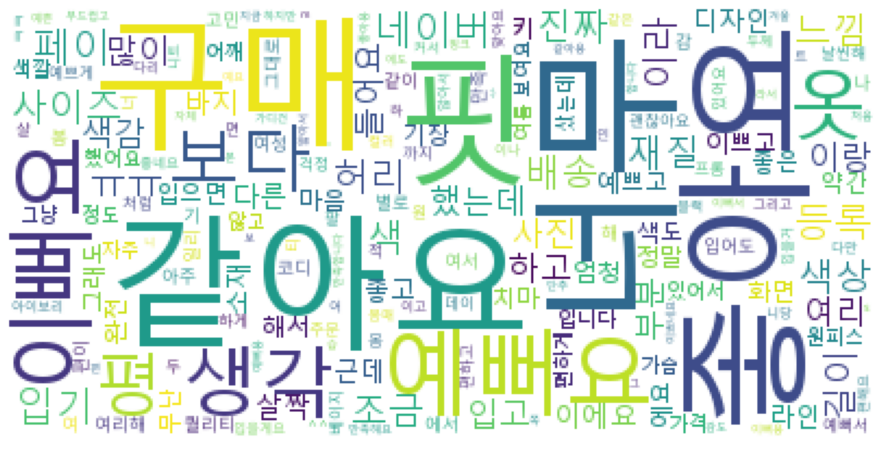

In [201]:
from wordcloud import WordCloud
wordcloud=WordCloud(font_path='C:\Windows\Fonts/malgun.ttf',
                   relative_scaling=0.2,
                   background_color='white',).generate_from_frequencies(ko.vocab())

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 텍스트 긍정 / 부정 예측 모델 만들기

### 1. 평점 전처리 함수 / 형태소 분석 함수 정의

이전 탐색적 데이터 분석 때 살펴보았듯이 1, 2점은 별로 없다. 그래서 3점도 부정으로 보고 학습시키는 것이 데이터 벨런스에 적합하다. 1,2,3점을 부정으로, 4,5점은 긍정으로 if문을 걸어주었다.

In [202]:
#평점 전처리 함수
def star_preprocessing(value):
    #value = int(text), 1,2점이 별로 없어서 3점까지 부정으로 보기
    if value<=3:
        return 0
    else : 
        return 1
    
#형태소 분석을 위한 함수 Okt(구 twitter사용)
def tokenizer(text):
    okt=Okt()
    return okt.morphs(text)



In [203]:
#수집한 데이터 읽어옴
df=pd.read_excel('Reviewata_clean.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57364 entries, 0 to 57363
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  57364 non-null  int64 
 1   상품명         57364 non-null  object
 2   평점          57364 non-null  int64 
 3   리뷰내용        57363 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.8+ MB


In [204]:
dfc=df.copy() #만약의 경우를 대비해 카피본 만들기

In [205]:
dfc['평점']=dfc['평점'].apply(star_preprocessing) 
#평점 칼럼에 star_preprocessing함수 적용

In [206]:
dfc.dropna(axis=0,how='any',inplace=True) #na가 있는 인덱스 제거

In [207]:
dfc

,Unnamed: 0,상품명,평점,리뷰내용
0,13699,라벨르 베이직셔츠,1,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...
1,13778,라벨르 베이직셔츠,1,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...
2,13970,라벨르 베이직셔츠,1,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!
3,14169,라벨르 베이직셔츠,1,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...
4,14903,라벨르 베이직셔츠,1,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...
...,...,...,...,...
57359,52139,힙스 조거팬츠,1,레깅스 말고도 편하게 입고 다닐만한 팬츠 찾고 있었어욤 \n대만족 입니당
57360,53947,힙스 조거팬츠,1,착용감이 좋고 핏이 이뻐요 강추합니다\n\n\n(2020-09-22 22:17:22...
57361,55343,힙스 조거팬츠,1,편하게 입기좋아요 티랑 같이구매했는데 딱이에요 편하고 핏도이뻐요
57362,55472,힙스 조거팬츠,1,편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...


In [208]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57363 entries, 0 to 57363
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  57363 non-null  int64 
 1   상품명         57363 non-null  object
 2   평점          57363 non-null  int64 
 3   리뷰내용        57363 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [209]:
text_list=dfc['리뷰내용'].tolist()
star_list=dfc['평점'].tolist()


In [210]:
# 80%는 train, 20%는 test데이터로 설정
from sklearn.model_selection import train_test_split
text_train,text_test,star_train,star_test=train_test_split(text_list,star_list,test_size=0.2,random_state=0)

In [211]:
def step1_data_preprocessing():
    df=pd.read_excel('Reviewata_clean.xlsx')
    df['평점']=df['평점'].apply(star_preprocessing)

    dfc=df.copy()
    dfc.dropna(axis=0,how='any',inplace=True)
    #학습 데이터와 테스트 데이터로 나눈다.
    text_list=dfc['리뷰내용'].tolist()
    star_list=dfc['평점'].tolist()
    
    from sklearn.model_selection import train_test_split
    
    text_train,text_test,star_train,star_test=train_test_split(text_list,star_list,test_size=0.2,random_state=0)
    
    return text_train,text_test,star_train,star_test

In [212]:
text_train

['색상도 똑같고 너무 이뻐서 다른색도 사고싶어요',
 '예뻐요 잘입었어요~~!! 허리는 타이트함',
 '허리쪽이 약간 뜨는것빼고는 좋습니다!',
 'ㅠㅠㅠㅠㅠ진짜너무예뻐요 다른색상은 안나올까욤 ㅠㅠㅠㅠㅠㅠ',
 '어깨선이 노출되다 보니 훨씬 여리해 보이구 바지랑 입으면 넘 이뿌네용ㅎㅎ',
 '사이즈는 생각보다 조금 작아서 수선해서 입엇어요 ㅜㅜ 핏은 예뻐요 ㅋ 배송은 넘 빨라서 좋앗어요 ㅋ\n\n(2020-11-20 00:02:03 에 등록된 네이버 페이 구매평)',
 '음 ..생각했던 것보다 가슴 쪽이 파였어요 사진에서 가슴골 보일정도 ? 쇄골 쪽으로 파여있는 건 예뻐요 근데 생각보다 흐물흐물한 느낌이고ㅠㅠ 기대보다는 일하였음',
 '화면이랑 똑같아요 가격도 착해서 세개 샀는데 맘에 들아요 교복이에요 ㅎㅎ',
 '배송 엄청 빠르구 넘 이뻐요 ㅠㅠ 무조건 사세엽..ㅠ',
 '기여워요 ㅎㅎ 부드럽고 좋아요',
 '옷 너무 예뻐요ㅠㅠㅠㅠ 🤭 좀 파이긴 했지만 적당히 파여서 더 이쁜거 같아용',
 '허리 라인도 잡아주고 예쁜거 같아요!\n색깔은 화면보다 조금더 분홍색이에요 😊',
 '화이트랑 핑크베이지랑 고민하다가 핑크베이지로 구매했어요.\n핑크빛은 안나고 거의 베이지 같아요.핑크느낌을 원했는데 아쉬웠어요ㅜ 두깨감이 있어 겨울에 입기 좋을 것 같아요.\n허리부분이 딱 붙고 넥라인이 부각돼서 섹시한 느낌도 나고 사랑스러운 느낌도 나요. 화이트도 구매할까 고민돼요.',
 '따뜻하게 입기 좋아요 색깔벌로 잘산거같아요',
 '오늘 입고 나갔다왔는데 이 옷 위에 코트 입으니까 딱이더라구용 ㅎㅎ 너무 얇지도 않고 재질도 좋아용\n색도 잘 빠져서 더 세련돼보이네용 ! 자주 입을 것 같아용',
 '밑위가 엄청 길어요... 근데 엄청 편하고.. 그럼',
 '두께감이 어느정도 있어서 입기 좋아요',
 '넘 예뻐요 재질도 보들보들해서 자주 입고 있어요',
 '베이지 맘에들어서 블랙도 삿어요 역시 이브네용',
 '신상 올라오자마자 바로 주문했어요! 배송도 빠르고, 직접 받아보니까 원단

In [213]:
#주어진 데이터를 단어 사전으로 만들고, 각 단어의 빈도수를 계산한 후 벡터화하는 객체 생성
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(lowercase=False,tokenizer=tokenizer)
tfidf.fit_transform(text_train)

<45890x29566 sparse matrix of type '<class 'numpy.float64'>'
	with 843726 stored elements in Compressed Sparse Row format>

In [214]:
#문장별 나오는 단어수를 세서 수치화, 벡터화해서 학습을 시킴
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pickle
logistic=LogisticRegression(C=10.0,penalty='l2',random_state=0)

pipe=Pipeline([('vect',tfidf),('clf',logistic)])
#학습
pipe.fit(text_train,star_train)
#학습 정확도 측정
y_pred=pipe.predict(text_test)
print(accuracy_score(star_test,y_pred))
#학습된 모델 저장
with open('pipe.dat','wb') as fp: #바이너리쓰기모드
    pickle.dump(pipe,fp)

print('저장완료')

C:\anaconda\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9307068770156018
저장완료


학습에 사용된 알고리즘은 크게 2가지이다.

1. Logistic Regression

- 긍정/부정 classification을 위해 필요하다.

2. TFIDF

- 단어가 어떤 문서에 얼마나 들어있는지에 따라 문서의 특성을 규정해주는 알고리즘이다.

- TF는 단어가 많을수록 가중치를 높여주는 알고리즘이고, IDF는 문서에 특정 단어가 희소할수록 그 문서의 특성을 규정해주는 알고리즘이다.

- 요약하면 TFxIDF는 특정 문서에 희소한 단어가 많을수록 그 문서가 어떤 특성인지 판단이 가능하다.

-> TFIDF로 특정 문서에 대한 특성을 예측하고, Logistic 알고리즘을 이용해서 리뷰가 긍정인지 부정인지 분류해주는 것이다.

In [215]:
def step2_learning(X_train,X_test,y_train,y_test):
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf=TfidfVectorizer(lowercase=False,tokenizer=tokenizer)
    
    #문장별 나오는 단어수를 세서 수치화, 벡터화해서 학습을 시킴
    from sklearn.linear_model import LogisticRegression
    from sklearn.pipeline import Pipeline
    logistic=LogisticRegression(C=10.0,penalty='l2',random_state=0)

    pipe=Pipeline([('vect',tfidf),('clf',logistic)])
    #학습
    pipe.fit(X_train,y_train)
    #학습 정확도 측정
    y_pred=pipe.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    #학습된 모델 저장
    with open('pipe.dat','wb') as fp:
        pickle.dump(pipe,fp)
        
    print('저장완료')

In [216]:
with open('pipe.dat','rb') as fp:
    pipe=pickle.load(fp)

### 5000개씩 나누어 array배열로 만든 다음, 이것들을 합쳐 데이터프레임으로 변환시켜 긍정확률이라는 새로운 항목을 만들어 추가

In [217]:
import numpy as np
text=dfc['리뷰내용'][:5000]

In [218]:
print(pipe.predict_proba(text.values.tolist()))
#해결책 : dtype object를 unicode로 바꿔야함

[[3.14874541e-03 9.96851255e-01]
 [2.39305955e-03 9.97606940e-01]
 [6.88732061e-04 9.99311268e-01]
 ...
 [2.91220027e-02 9.70877997e-01]
 [1.26628154e-02 9.87337185e-01]
 [1.34581173e-02 9.86541883e-01]]


In [219]:
text

0       두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...
1       딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...
2                            청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!
3       청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...
4       보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...
                              ...                        
4996                            조금 노란아이보리인뎅 예뻐용 ㅎㅎ 하늘하늘해여
4997                      라벤더색 연해요. 그렇지만 딱 가격값정도의 퀄리티입니다.
4998    여리여리 핏이 예뻐요. 승모 있는 분들은 덩치 았어보일 수도 있어요! 아이보리인데도...
4999                편안하게 꾸안꾸로 아주 잘 입을것같아요\n색깔도 사진이랑 동일해요😊
5000                          야들야들?한 재질이고 여리여리하게 입을 수 있어요
Name: 리뷰내용, Length: 5000, dtype: object

In [220]:
n=pipe.predict_proba(text.values.tolist()) # 각 항목에 대한 확률
r1=np.max(n) * 100 # 긍정확률 * 100
#r2=pipe.predict(text)[0]

In [221]:
text.values.tolist() # 리뷰들을 리스트 형태로 출력

['두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담에 다른색도 사고싶어요',
 '딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 좋아요ㅎㅎ\n생각보다 안 커서 여기저기 입기 좋아요👍🏻👍🏻',
 '청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!',
 '청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난해보이지만은 않아서 좋았어용',
 '보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 같이 입으니까 더 예쁜거 같아유 ㅎ',
 '두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담에 다른색도 사고싶어요',
 '딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 좋아요ㅎㅎ\n생각보다 안 커서 여기저기 입기 좋아요👍🏻👍🏻',
 '청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!',
 '청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난해보이지만은 않아서 좋았어용',
 '보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 같이 입으니까 더 예쁜거 같아유 ㅎ',
 '이런 비슷한 셔츠 다른 쇼핑몰에서도 샀었는데... 진짜 여기게 제일 예뻐요..진짜 핏도 소재도. 같이 산 스커트도 깔별로 사려고 하는데 셔츠도 깔별로 사야해요.',
 '색감이 이쁘고 맘에들어요 근데 생각보단 조금 커요~\n\n\n(2021-07-10 22:00:16 에 등록된 네이버 페이 구매평)',
 '링클프리라 옷감 구김도 별로 없고 너무 편하게 데일리로 잘 입고 있습니다. 프롬데이원 옷들은 질이 전부 좋은 것 같아요.!\n\n\n(2021-07-06 15:25:24 에 등록된 네이버 페이 구매평)',
 '링클프리라 옷감 구김도 별로 없고 너무 편하게 데일리로 잘 입고 있습니다. 프롬데이원 옷들은 질이 전부 좋은 것 같아요.!\n\n\n(2021-

In [222]:
n=pipe.predict_proba(text.values.tolist())# 각 항목에 대한 확률
r1=np.max(n,axis=1) * 100 #r1은 긍정일 확률 * 100
r1

array([99.68512546, 99.76069404, 99.93112679, ..., 97.08779973,
       98.73371846, 98.65418827])

In [223]:
ar1=r1
ar1

array([99.68512546, 99.76069404, 99.93112679, ..., 97.08779973,
       98.73371846, 98.65418827])

In [224]:
text=dfc['리뷰내용'][5000:10000]
print(pipe.predict_proba(text.values.tolist()))

[[5.31874254e-04 9.99468126e-01]
 [2.64360780e-01 7.35639220e-01]
 [5.32915639e-03 9.94670844e-01]
 ...
 [2.20127773e-01 7.79872227e-01]
 [2.48689289e-02 9.75131071e-01]
 [6.19972620e-04 9.99380027e-01]]


In [225]:
n=pipe.predict_proba(text.values.tolist())# 각 항목에 대한 확률
r1=np.max(n) * 100
text.values.tolist()

['이쁘고 좋아용 ㅎㅎ 감사합니당!!☆☆',
 '생각보다 두껍고 많이 파였네요\n그래도 촉촉한 원단이라 마음에 듭니다',
 '촉감 너무 좋아요\n무난한스타일이라 잘 입어질거같구\n지금입기엔 조금 더워서 잘 모셔뒀다 추우면 입으려구요ㅎㅎㅎ',
 '화면보다 노랗구 주름이 정말 잘 가네요.. 그래도 몸에 촤르륵 붙긴해서 시원해요',
 '근데 아거 입으면 짱 여리여리해보여서 진짜 자주 입을거 같아요',
 '이 옷은 생각보다는 살짝 실망했어요 ㅜㅜ\n뭔가 집에서 입어야 될 것 같은 느낌..',
 '엄청 부드럽고 찰랑거리는 소재예요. 덥지도 않고 좋아요!',
 'ㅠㅠ진짜옷도부들부들하고\n핏도 너므 예뻐요ㅜㅜ진즉에 살걸하는 아쉬움이드네요',
 '이뻐요 일단 재질이 진짜 좋은 것 같아요! 핏도 이쁘고 봄 여름 가을 다 잘 입을 수 있을 것 같아요!',
 '배송이 좀 늦긴 했지만 그래도 이뻐용',
 '예뻐서 손 자주가요 ㅎㅎ 근데 생각보다 크네요',
 '그냥 괜찮아여 그냥 입을만한 정도에요',
 '라벤더 샀는데 진짜 예쁘고 마음에 들어요!',
 '코디 그대로 구매했어여\n맘에 들어서 라벤더도 같이 구매했는데\n둘 다 잘입을거 같아여',
 '상세 코디처럼 아래 흰치마 입으니 세상 여리해보이네여 \n맘에 들어서 블랙도 같이 구매했어요\n상세 코디처럼 아래 흰치마 입으니 세상 여리해보이네여\n맘에 들어서 블랙도 같이 구매했어요',
 '이쁜데 너무 파여서 안에 나시필수로 입어야겠어요',
 '차르르 떨어지는 소재감에 긴팔이어도 시원해요!\n편하게 입기 좋고 날씬해보여요.\n검은색도 같이 사서 잘입고 있습니당',
 '사실 받자마자 입어보지도 않고 세탁해버려서 큰 기대 없었는데 아침 출근 하기 전 입는 순간,, 촉감에 깜짝 놀라고 통기성에 두 번 놀랐어요! 약간 냉장고? 비슷한 재질이라 바람도 잘 통해서 시원해요! 일단 부들부들 미쳤습니다ㅠㅠ 질이 이렇게 좋을 줄은 몰랐어요. 기대 하나도 안 했는데..ㅎㅎ 색깔도 화면보단 약간 더 소라빛이 강조된 느낌이 없지 않은데 그래도 연보라보라 느낌

In [226]:
n=pipe.predict_proba(text.values.tolist())# 각 항목에 대한 확률
r1=np.max(n,axis=1) * 100 #r1은 긍정일 확률 * 100
r1

array([99.94681257, 73.56392203, 99.46708436, ..., 77.98722273,
       97.51310711, 99.93800274])

In [227]:
ar2=r1
ar2

array([99.94681257, 73.56392203, 99.46708436, ..., 77.98722273,
       97.51310711, 99.93800274])

In [229]:
text=dfc['리뷰내용'][10000:15000]
n=pipe.predict_proba(text.values.tolist())# 각 항목에 대한 확률
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1은 긍정일 확률 * 100
r1

array([94.57876698, 99.94463406, 96.55951404, ..., 98.27679947,
       99.6814233 , 97.53660123])

In [230]:
ar3=r1
ar3

array([94.57876698, 99.94463406, 96.55951404, ..., 98.27679947,
       99.6814233 , 97.53660123])

In [231]:
text=dfc['리뷰내용'][15000:20000]
n=pipe.predict_proba(text.values.tolist())# 각 항목에 대한 확률
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1은 긍정일 확률 * 100
ar4=r1
ar4

array([99.1056252 , 99.59407525, 86.72248633, ..., 99.87381884,
       99.78674531, 98.42613447])

In [232]:
text=dfc['리뷰내용'][20000:25000]
n=pipe.predict_proba(text.values.tolist())# 각 항목에 대한 확률
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1은 긍정일 확률 * 100
ar5=r1
ar5

array([99.75441387, 99.76808681, 82.6178339 , ..., 99.14536155,
       69.0198839 , 88.83994682])

In [233]:
text=dfc['리뷰내용'][25000:30000]
n=pipe.predict_proba(text.values.tolist())# 각 항목에 대한 확률
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1은 긍정일 확률 * 100
ar6=r1
ar6

array([72.02024351, 96.30916131, 99.70580839, ..., 98.06988531,
       98.06988531, 91.27939843])

In [234]:
text=dfc['리뷰내용'][30000:35000]
n=pipe.predict_proba(text.values.tolist())# 각 항목에 대한 확률
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1은 긍정일 확률 * 100
ar7=r1
ar7

array([99.11807492, 99.24603464, 95.42328676, ..., 99.46611096,
       99.30994422, 99.31726572])

In [235]:
text=dfc['리뷰내용'][35000:40000]
n=pipe.predict_proba(text.values.tolist())# 각 항목에 대한 확률
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1은 긍정일 확률 * 100
ar8=r1
ar8

array([99.98551325, 99.42932193, 96.5662459 , ..., 93.05365977,
       99.86387246, 89.97233847])

In [236]:
text=dfc['리뷰내용'][40000:45000]
n=pipe.predict_proba(text.values.tolist())# 각 항목에 대한 확률
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1은 긍정일 확률 * 100
ar9=r1
ar9

array([90.27427754, 97.48009993, 69.95864136, ..., 98.28607544,
       99.59604978, 99.96151096])

In [237]:
text=dfc['리뷰내용'][45000:50000]
n=pipe.predict_proba(text.values.tolist())# 각 항목에 대한 확률
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1은 긍정일 확률 * 100
ar10=r1
ar10

array([98.64829014, 99.30475303, 99.5817346 , ..., 86.38374419,
       99.45021294, 99.98515594])

In [238]:
text=dfc['리뷰내용'][50000:]
n=pipe.predict_proba(text.values.tolist())# 각 항목에 대한 확률
r1=np.max(n) * 100
n=pipe.predict_proba(text.values.tolist())
r1=np.max(n,axis=1) * 100 #r1은 긍정일 확률 * 100
ar11=r1
ar11

array([68.57894559, 99.8860612 , 99.96702479, ..., 99.99005296,
       83.95864954, 82.16021125])

In [239]:
# 전체 긍정확률 array들을 결합
aa=np.concatenate((ar1,ar2,ar3,ar4,ar5,ar6,ar7,ar8,ar9,ar10,ar11),axis=0) #합치기 
dfa=pd.DataFrame(aa) #데이터프레임으로 변환
dfa

,0
0,99.685125
1,99.760694
2,99.931127
3,99.207599
4,99.031116
...,...
57358,97.269521
57359,99.268411
57360,99.990053
57361,83.958650


In [241]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57363 entries, 0 to 57363
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  57363 non-null  int64 
 1   상품명         57363 non-null  object
 2   평점          57363 non-null  int64 
 3   리뷰내용        57363 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [242]:
df.dropna(axis=0,how='any',inplace=True)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57363 entries, 0 to 57363
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  57363 non-null  int64 
 1   상품명         57363 non-null  object
 2   평점          57363 non-null  int64 
 3   리뷰내용        57363 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [182]:
df.iloc[2480:2500]

,Unnamed: 0,상품명,평점,content
2480,2642,노버 퍼프 스퀘어티,5,예뻐요! 바지가 배송이 늦어서 티먼저와써요!
2481,2818,노버 퍼프 스퀘어티,5,이쁘고 이런디자인 많이 내주세요ㅠㅠ 팔뚝뚜거운분들은 이거사세요ㅠㅠ 진짜 팔은 신경안...
2482,2819,노버 퍼프 스퀘어티,5,이쁘고요 속옷이 풀컵으로 된건 피해애될거같아요ㅠ 앞에부븐이 흘러내려서 ㅠㅠ
2483,2840,노버 퍼프 스퀘어티,5,살빠져보이게 몸매 이뻐보이게 해줍니닿ㅎ!! 보풀은 어쩔 수 없지만 감수하고도 이뻐서...
2484,2841,노버 퍼프 스퀘어티,5,화면이랑 똑같아요\n재질도 부드러워용 !
2485,2842,노버 퍼프 스퀘어티,4,다 좋은데 색이 좀 달라요\n그거빼고 만족해여
2486,3065,노버 퍼프 스퀘어티,5,가슴 부분이 조금 파인 것 같지만 입을 수 있는 정도에요 예뻐요
2488,3320,노버 퍼프 스퀘어티,4,다 좋은데 너무 잘흘러내려요ㅜ 제어깨글케좁은것두아닌디 ...
2489,3328,노버 퍼프 스퀘어티,3,넘 심하게 타이트하고 \n속옷을 어떻게 입어도 보일거같아요 ㅠㅠ \n피팅을 잘 하신...
2490,3392,노버 퍼프 스퀘어티,4,가슴이 엄청 파였어요!! ㅋㅋ 그래도 예쁩니다


In [176]:
# 긍정확률 칼럼을 원래 데이터인 df에 추가
df['긍정확률']=dfa
df

,Unnamed: 0,상품명,평점,리뷰내용,긍정확률
0,13699,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,99.685125
1,13778,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,99.760694
2,13970,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,99.931127
3,14169,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,99.207599
4,14903,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,99.031116
...,...,...,...,...,...
57359,52139,힙스 조거팬츠,5,레깅스 말고도 편하게 입고 다닐만한 팬츠 찾고 있었어욤 \n대만족 입니당,99.268411
57360,53947,힙스 조거팬츠,5,착용감이 좋고 핏이 이뻐요 강추합니다\n\n\n(2020-09-22 22:17:22...,99.990053
57361,55343,힙스 조거팬츠,5,편하게 입기좋아요 티랑 같이구매했는데 딱이에요 편하고 핏도이뻐요,83.958650
57362,55472,힙스 조거팬츠,5,편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...,82.160211


In [167]:
df[57362:]

,Unnamed: 0,상품명,평점,리뷰내용,긍정확률
57362,55472,힙스 조거팬츠,5,편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...,82.160211
57363,55476,힙스 조거팬츠,5,편해서 자주입고잇습니다\n\n(2020-08-29 22:51:14 에 등록된 네이버...,NaN


In [159]:
#df['긍정확률'].iloc[57363]=df['긍정확률'].iloc[57362]

C:\anaconda\envs\nlp\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [160]:
df.tail()

,Unnamed: 0,상품명,평점,리뷰내용,긍정확률
57359,52139,힙스 조거팬츠,5,레깅스 말고도 편하게 입고 다닐만한 팬츠 찾고 있었어욤 \n대만족 입니당,99.268411
57360,53947,힙스 조거팬츠,5,착용감이 좋고 핏이 이뻐요 강추합니다\n\n\n(2020-09-22 22:17:22...,99.990053
57361,55343,힙스 조거팬츠,5,편하게 입기좋아요 티랑 같이구매했는데 딱이에요 편하고 핏도이뻐요,83.958650
57362,55472,힙스 조거팬츠,5,편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...,82.160211
57363,55476,힙스 조거팬츠,5,편해서 자주입고잇습니다\n\n(2020-08-29 22:51:14 에 등록된 네이버...,82.160211


In [161]:
df

,Unnamed: 0,상품명,평점,리뷰내용,긍정확률
0,13699,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,99.685125
1,13778,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,99.760694
2,13970,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,99.931127
3,14169,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,99.207599
4,14903,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,99.031116
...,...,...,...,...,...
57359,52139,힙스 조거팬츠,5,레깅스 말고도 편하게 입고 다닐만한 팬츠 찾고 있었어욤 \n대만족 입니당,99.268411
57360,53947,힙스 조거팬츠,5,착용감이 좋고 핏이 이뻐요 강추합니다\n\n\n(2020-09-22 22:17:22...,99.990053
57361,55343,힙스 조거팬츠,5,편하게 입기좋아요 티랑 같이구매했는데 딱이에요 편하고 핏도이뻐요,83.958650
57362,55472,힙스 조거팬츠,5,편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...,82.160211


In [162]:
df.to_excel('긍정확률.xlsx',index=False)

In [164]:
df.iloc[2487]

Unnamed: 0          3288
상품명           노버 퍼프 스퀘어티
평점                     1
리뷰내용                 NaN
긍정확률            91.48407
Name: 2487, dtype: object